# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (8)

**23/10/2023**

# Decision Tree Regression

## Árboles de regresión

* Los árboles de regresión son el subtipo de árboles de decisión que se aplica cuando **la variable objetivo es continua**.

* En términos generales, en el entrenamiento de un árbol de regresión, las observaciones se van distribuyendo por **bifurcaciones (nodos)** generando la estructura del árbol hasta alcanzar un nodo terminal.  
 
* Cuando se quiere predecir una nueva observación, **se recorre el árbol** acorde al valor de sus predictores hasta alcanzar uno de los nodos terminales. 

* La **predicción del árbol es la media de la variable respuesta** de las observaciones de entrenamiento que están en ese mismo nodo terminal.

El algoritmo de ***Decision Tree regressor*** realiza estos dos pasos generando particiones del espacio de solución hasta que se alcance el criterio de parada:  

* Dado un conjunto de variables, encontrar la variable que permita predecir mejor la variable objetivo (target):  **criterio de corte**    
* Encontrar el valor por donde cortar sobre esa variable que permita predecir mejor la variable de respuesta (target):  **punto de corte**

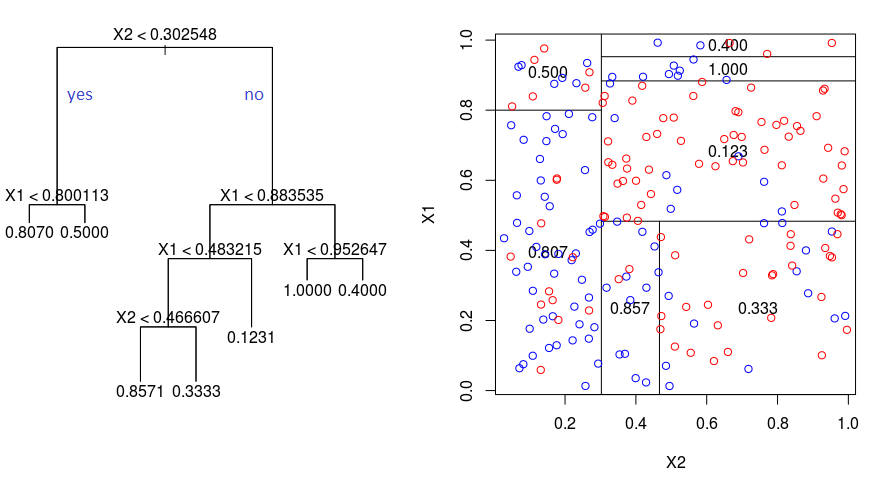

Volvemos a generar un modelo para predecir los precios de viviendas en Boston:

In [5]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Boston housing dataset

> #### **¡Nota importante!**  
> El conjunto de datos de precios de la vivienda de _Boston_ tiene un **`problema ético`**:  
  como se investigó en [este artículo](https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8), los autores de este conjunto de datos diseñaron una variable no invertible **"B" asumiendo que la autosegregación racial tuvo un impacto positivo en los precios de la vivienda**.  
>   
>  Además, el objetivo de la investigación que condujo a la creación de este conjunto de datos fue estudiar el impacto de la calidad del aire, pero **no proporcionó una demostración adecuada de la validez de dicha suposición**.
 Por lo tanto, los mantenedores de _scikit-learn_ **desaconsejan fuertemente** el uso de este conjunto de datos a menos que el propósito del  código sea **estudiar y educar sobre cuestiones éticas** en la ciencia de datos y el aprendizaje automático. 
>  
> A partir de la *versión 1.2 de Scikit-learn* **se ha eliminado este conjunto de datos**. Sin embargo, se puede descargar en las versiones anteriores o de forma manual: 

In [7]:
### Para versiones < 1.2

# Importamos los datos de la misma librería de scikit-learn
from sklearn.datasets import load_boston
boston = load_boston()

# Convertir los datos en pandas dataframe
dataframe_x = pd.DataFrame(boston.data, columns = boston.feature_names)

# La variable dependiente es el target y la llamammos dataframe_y
dataframe_y = pd.DataFrame(boston.target, columns = ['target'])

# Combinamos ambos para obtener un dataframe con todas las variables explicativas y la variable objetivo
df_boston = dataframe_x.join(dataframe_y)

df_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [8]:
# cargar el dataset de boston
df_boston = pd.read_csv("dataset_boston.csv", index_col=0)
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


Características del conjunto de datos:
 
    -Número de muestras: 506
 
    -Número de atributos: 13 predictivo numérico / categórico
 
    -Median value (atributo 14) suele ser el objetivo.
    
Información de atributos (en orden):

        - CRIM tasa de delincuencia per cápita por ciudad
        - Proporción ZN de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.
        - Proporción INDUS de acres comerciales no minoristas por ciudad 
        - Variable ficticia CHAS Charles River (= 1 si el tramo limita con el río; 0 en caso contrario)
        - Concentración de óxidos nítricos NOX (partes por 10 millones)
        - RM número medio de habitaciones por vivienda
        - Proporción de EDAD de las unidades ocupadas por el propietario construidas antes de 1940
        - Distancias ponderadas DIS a cinco centros de empleo de Boston
        - Índice RAD de accesibilidad a carreteras radiales
        - IMPUESTO Tasa de impuesto a la propiedad de valor total por \$ 10,000\
        - PTRATIO Ratio maestro-alumno por municipio
        - B 1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de negros por ciudad
        - LSTAT % menor estatus de la población
        - MEDV Valor medio de las viviendas ocupadas por el propietario en \$ 1000\

In [9]:
# La información principal del dataset
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 59.3 KB


Definimos los datos del modelo con todas las variables de entrada **menos la variable éticamente incorrecta**


In [10]:
X_multiple = df_boston.drop(['target', 'B'], axis='columns')
y_multiple = df_boston['target']

A pesar de que es una práctica común y recomendada, esta vez no modificamos la *[estructura de datos](https://scikit-learn.org/stable/glossary.html#term-array-like)* antes de pasarlo al modelo.

In [11]:
X_multiple

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48


In [12]:
y_multiple

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: target, Length: 506, dtype: float64

In [13]:
# Dividir el dataset en Training y Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2, random_state=222)

#### Aplicar el modelo de regresión no-lineal con “Árboles de Decisión”

In [14]:
from sklearn.tree import DecisionTreeRegressor


arbol = DecisionTreeRegressor(max_depth=3, random_state=100)

In [15]:
# Ajustamos el algoritmo al conjunto de datos de entrenamiento

arbol.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=100)

In [16]:
# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)

y_pred = arbol.predict(X_test) 

#### Evaluación del modelo a través de sus métricas

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_pred)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2 coefficient of determination:', r2_score(y_test, y_pred))

Mean Absolute Error: 3.1410653750316175
Mean Absolute Percentage Error: 17.324173934129327
Mean Squared Error: 17.03087826102649
Root Mean Squared Error: 4.126848465963645
R^2 coefficient of determination: 0.8095289935863711


Veamos cuál fue la precisión alcanzada por nuestro árbol tanto en la etapa de entrenamiento como en la fase de test, para ello usamos el **``score``**:

In [18]:
# Score:  Goodness to fit o R^2 que representa la calidad de las predicciones
print("R^2 de entrenamiento:", arbol.score(X_train,y_train))
print("R^2 de prueba (test):", arbol.score(X_test,y_test))

R^2 de entrenamiento: 0.8140508666611368
R^2 de prueba (test): 0.8095289935863711


Vamos a obtener más información acerca del árbol de decisión del modelo usando las siguientes funciones:

In [19]:
print("La profundidad del árbol:", arbol.get_depth())
print("El número de hojas del árbol:", arbol.get_n_leaves())

La profundidad del árbol: 3
El número de hojas del árbol: 8


In [20]:
# Parámetros indicados en la definicón del árbol
arbol.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 100,
 'splitter': 'best'}

Para visualizar el proceso de los árboles de regresión podemos utilizar lo siguente:

In [21]:
from sklearn import tree
arbol_texto = tree.export_text(arbol)
print(arbol_texto)

|--- feature_5 <= 6.83
|   |--- feature_11 <= 14.40
|   |   |--- feature_7 <= 1.37
|   |   |   |--- value: [42.63]
|   |   |--- feature_7 >  1.37
|   |   |   |--- value: [22.93]
|   |--- feature_11 >  14.40
|   |   |--- feature_7 <= 2.00
|   |   |   |--- value: [12.00]
|   |   |--- feature_7 >  2.00
|   |   |   |--- value: [17.35]
|--- feature_5 >  6.83
|   |--- feature_5 <= 7.44
|   |   |--- feature_4 <= 0.66
|   |   |   |--- value: [32.17]
|   |   |--- feature_4 >  0.66
|   |   |   |--- value: [16.40]
|   |--- feature_5 >  7.44
|   |   |--- feature_10 <= 19.65
|   |   |   |--- value: [45.83]
|   |   |--- feature_10 >  19.65
|   |   |   |--- value: [21.90]



In [22]:
# Los features son las variables que se nombran en cada column
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT'],
      dtype='object')

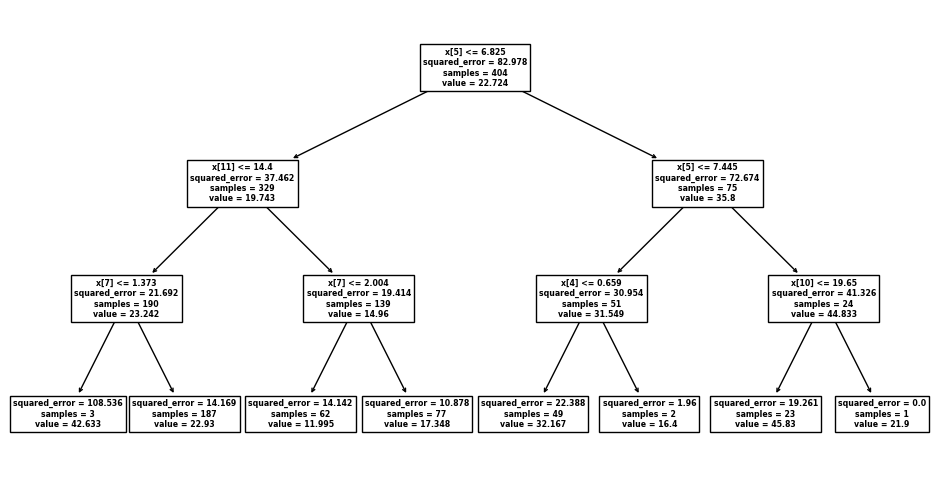

In [23]:
# Consultar la estructura visual del árbol
tree.plot_tree(arbol)
plt.show()

<Axes: >

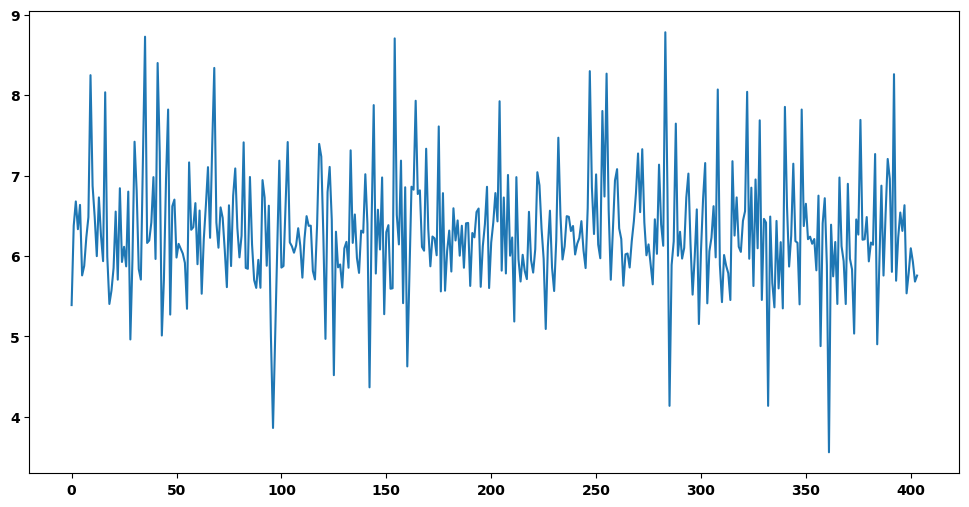

In [24]:
# Sacamos una visualización sencilla de los valores del primer feature
X_train['RM'].reset_index()['RM'].plot()

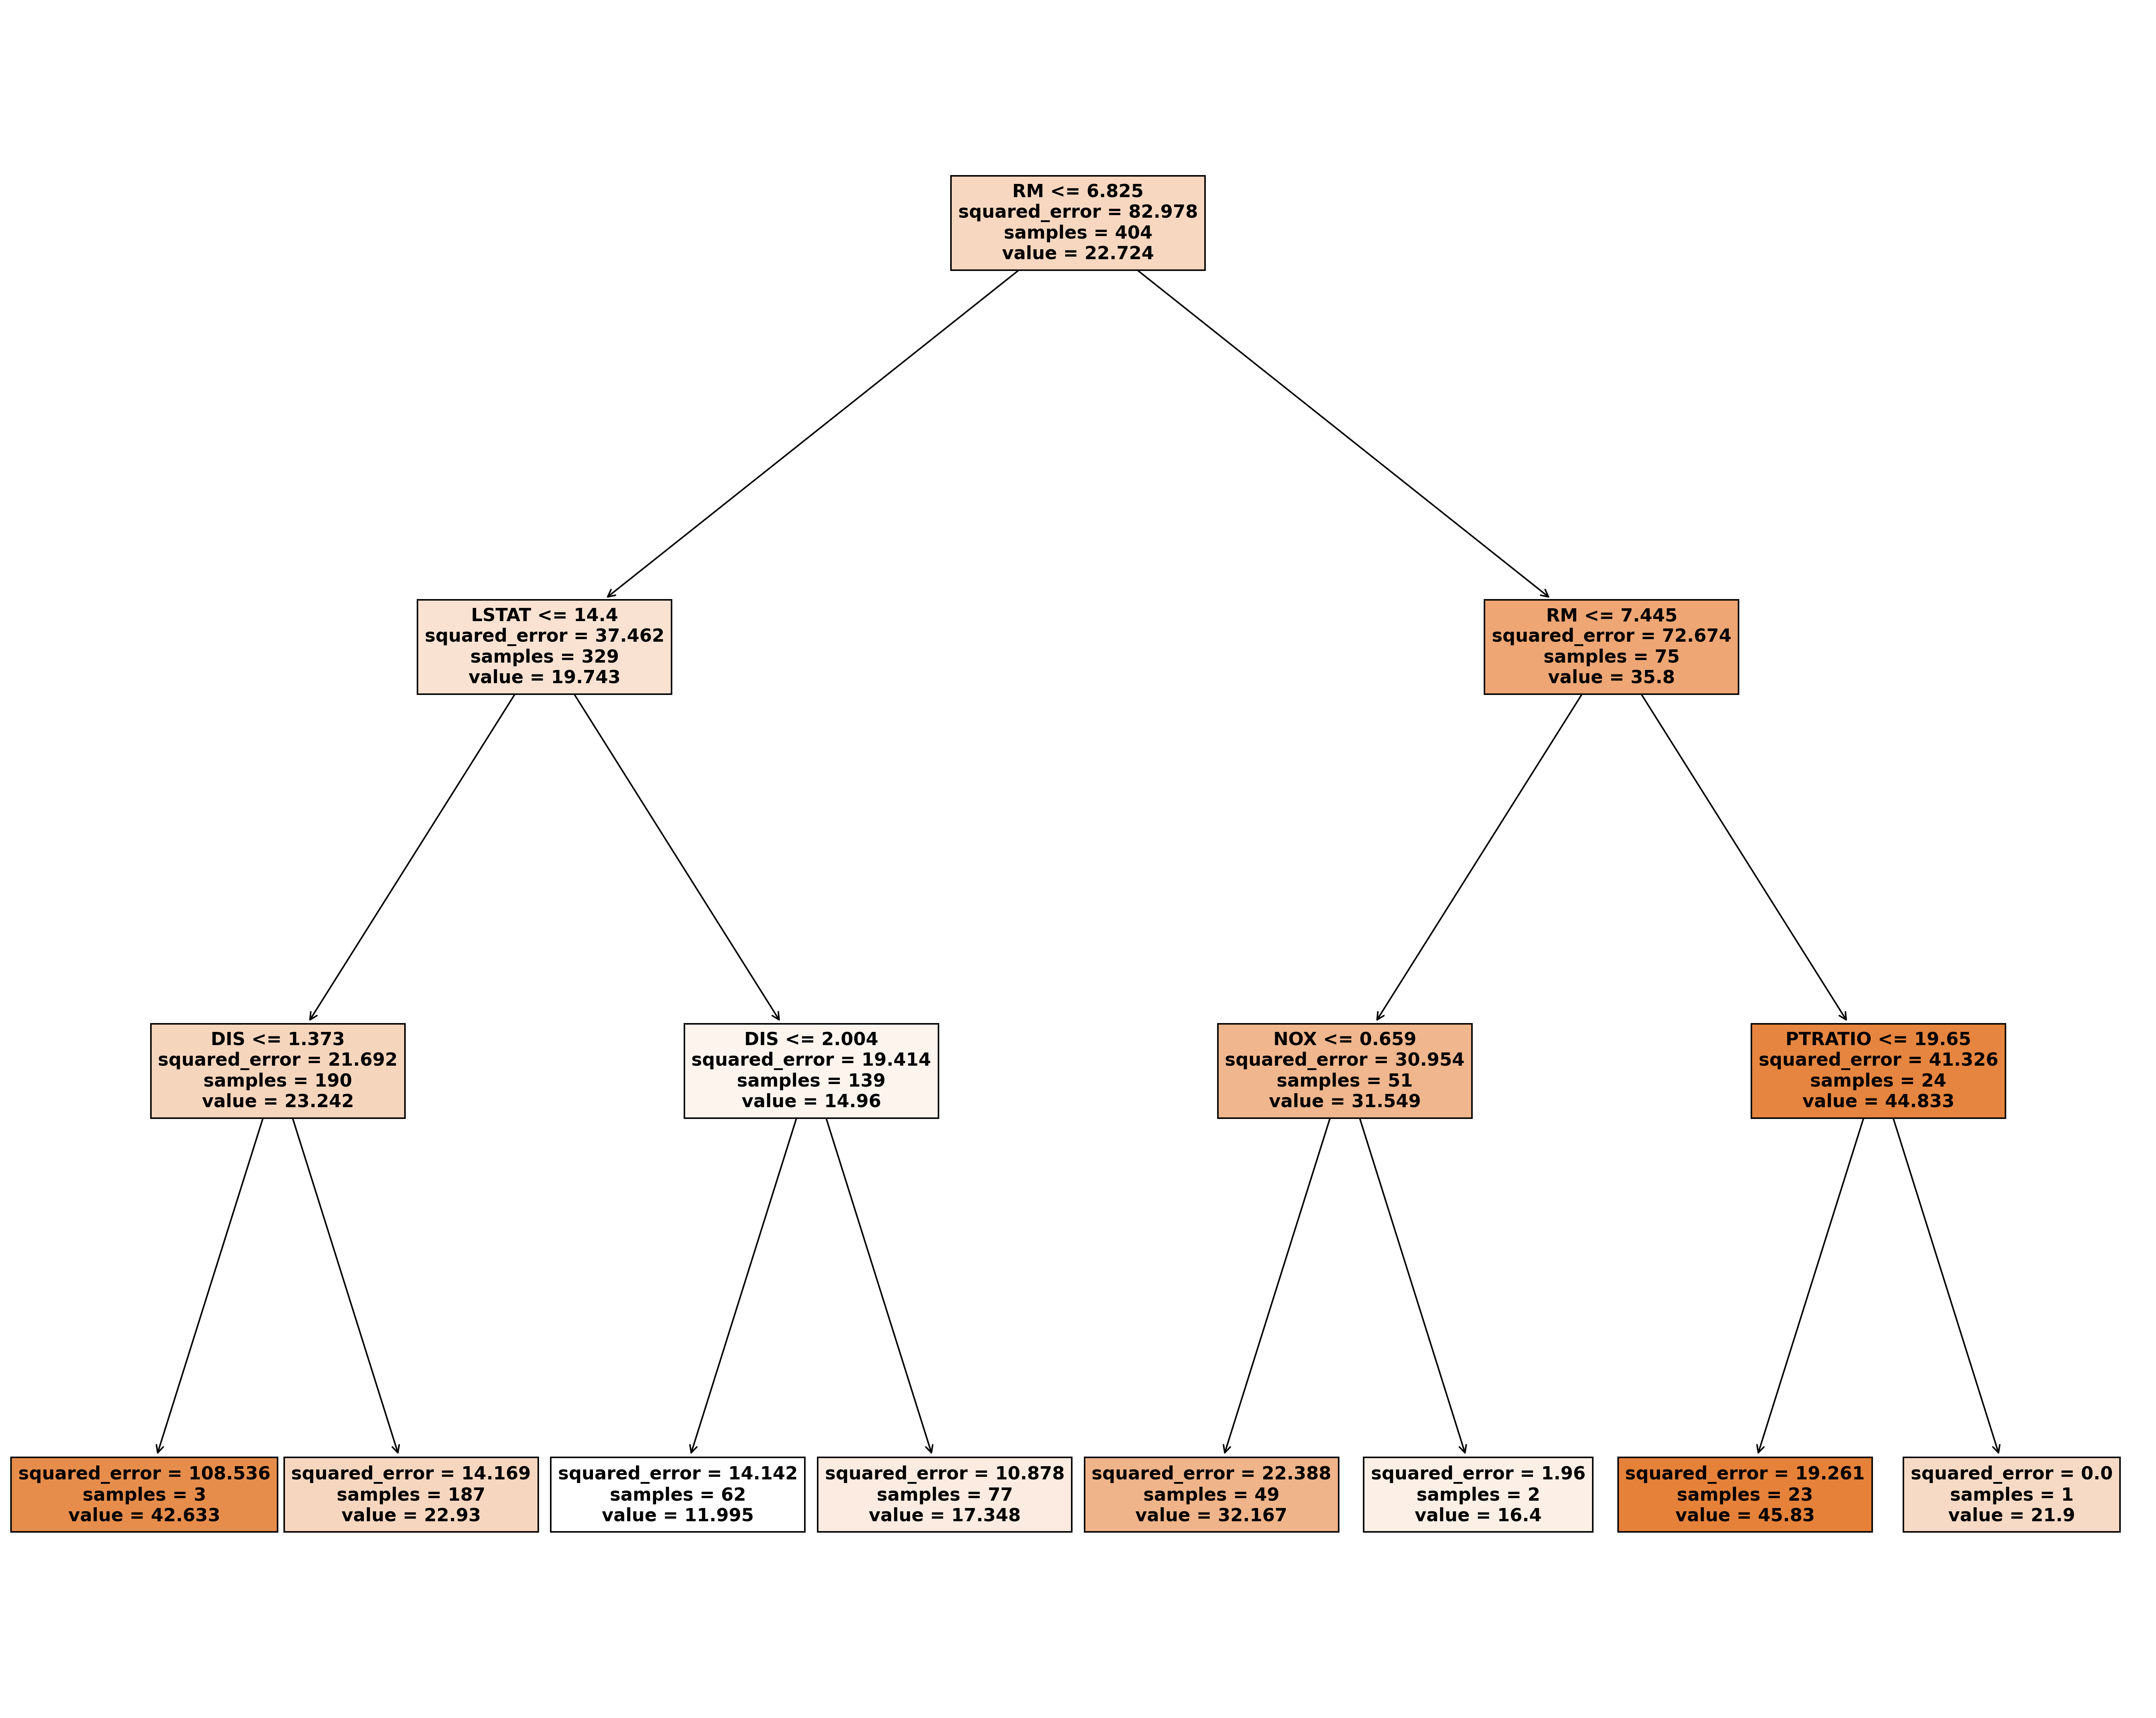

In [25]:
# Genrar una foto del árbol y guardarla en la carpeta de trabajo

fig = plt.figure(figsize=(25,20), dpi=300)
_ = tree.plot_tree(arbol, feature_names=X_train.columns.to_list(), filled=True)

fig.savefig("decistion_tree_plot.png")

#### Ahora nos fijamos en los valores estimados y predichos para entender bien la salida de un árbol de decisión:

In [26]:
# Sacar los valores estimados (salida del modelo para el conjunto de training)
y_estimated = arbol.predict(X_train)
y_estimated

array([17.34805195, 17.34805195, 22.93048128, 22.93048128, 22.93048128,
       22.93048128, 22.93048128, 22.93048128, 22.93048128, 45.83043478,
       32.16734694, 11.99516129, 22.93048128, 22.93048128, 22.93048128,
       17.34805195, 45.83043478, 17.34805195, 17.34805195, 17.34805195,
       17.34805195, 22.93048128, 22.93048128, 32.16734694, 17.34805195,
       17.34805195, 22.93048128, 22.93048128, 22.93048128, 17.34805195,
       32.16734694, 22.93048128, 11.99516129, 22.93048128, 32.16734694,
       45.83043478, 17.34805195, 11.99516129, 22.93048128, 32.16734694,
       22.93048128, 45.83043478, 32.16734694, 22.93048128, 17.34805195,
       32.16734694, 45.83043478, 11.99516129, 22.93048128, 17.34805195,
       22.93048128, 11.99516129, 17.34805195, 17.34805195, 17.34805195,
       17.34805195, 32.16734694, 22.93048128, 22.93048128, 11.99516129,
       22.93048128, 22.93048128, 11.99516129, 22.93048128, 17.34805195,
       32.16734694, 22.93048128, 32.16734694, 45.83043478, 17.34

In [27]:
# Veamos qué variedad tienen los datos ajustados 
pd.Series(y_estimated).value_counts()

22.930481    187
17.348052     77
11.995161     62
32.167347     49
45.830435     23
42.633333      3
16.400000      2
21.900000      1
Name: count, dtype: int64

In [28]:
# Consultamos la variedad de los datos predichos
pd.Series(y_pred).value_counts() 

22.930481    52
11.995161    23
17.348052    11
32.167347     7
45.830435     6
42.633333     2
16.400000     1
Name: count, dtype: int64

Básicamente el número de los nodos terminales o las hojas del árbol (**leaf nodes**) determinan cuantos valores únicos tendría la salida del modelo.

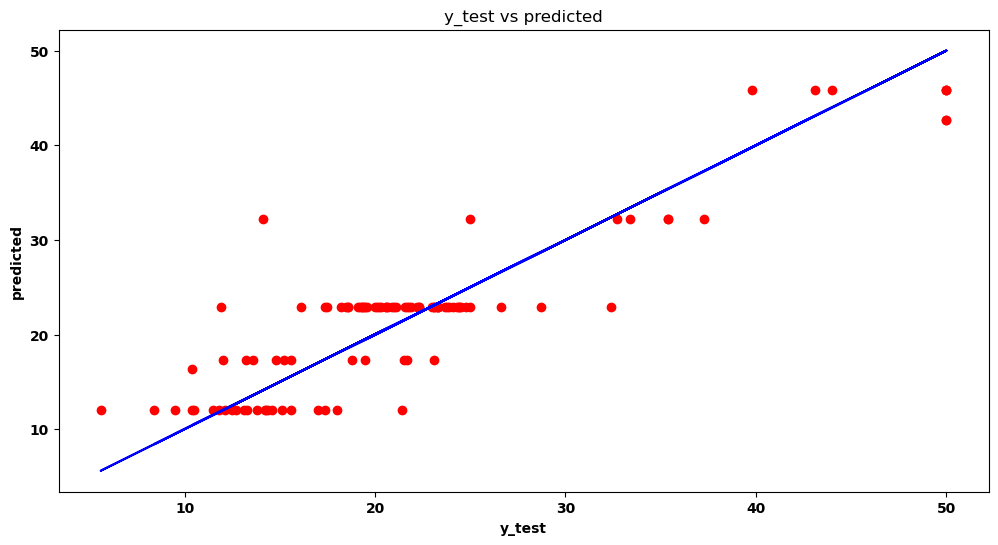

In [29]:
# visualizamos las predicciones
plt.scatter(y_test, y_pred, color = 'red')
plt.plot(y_test, y_test, color = 'blue')
plt.title('y_test vs predicted')
plt.xlabel('y_test')
plt.ylabel('predicted')
plt.show()

Como se puede observar, a la hora de generar el árbol podemos indicar una serie de hiperparámetros para el elgoritmo de *Decision Tree Regressor*. El hiperpárametro que más afecta a este tipo de modelos es la profundidad máxima del árbol (**max_depth**)

In [30]:
# Creamos otro modelo cambiando el hiperparámetro
arbol = DecisionTreeRegressor(max_depth=4, random_state=100)

# Entrenamos el nuevo modelo
arbol.fit(X_train, y_train)

y_predict = arbol.predict(X_test) 

In [31]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test, y_predict))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, y_predict)*100)
print('Mean Squared Error:', mean_squared_error(y_test, y_predict))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))
print('R^2 coefficient of determination:', r2_score(y_test, y_predict))

Mean Absolute Error: 2.4712213948428774
Mean Absolute Percentage Error: 13.708292979483241
Mean Squared Error: 11.855106860798642
Root Mean Squared Error: 3.443124578170044
R^2 coefficient of determination: 0.8674141109865854


Se ve que se consigue esta vez un mejor modelo con más calidad incluso respecto al árbol inicial. Sin embargo debemos tener mucho cuidado con aumentar la profundidad del árbol que indica **una mayor complejidad** del modelo:  
- Los modelos más complejos conllevan un coste: **Más grande, más recursos y menos interpretable**.  

- Los modelos más complejos suelen sufrir de overfitting:  **Más sobre ajustado y menos genérico**.  

Por ello vamos a analizar el rendimiento del modelo frente a la complejidad del árbol por ser más profundo:

### Curva de complejidad del modelo (**Model Complexity Curve**)

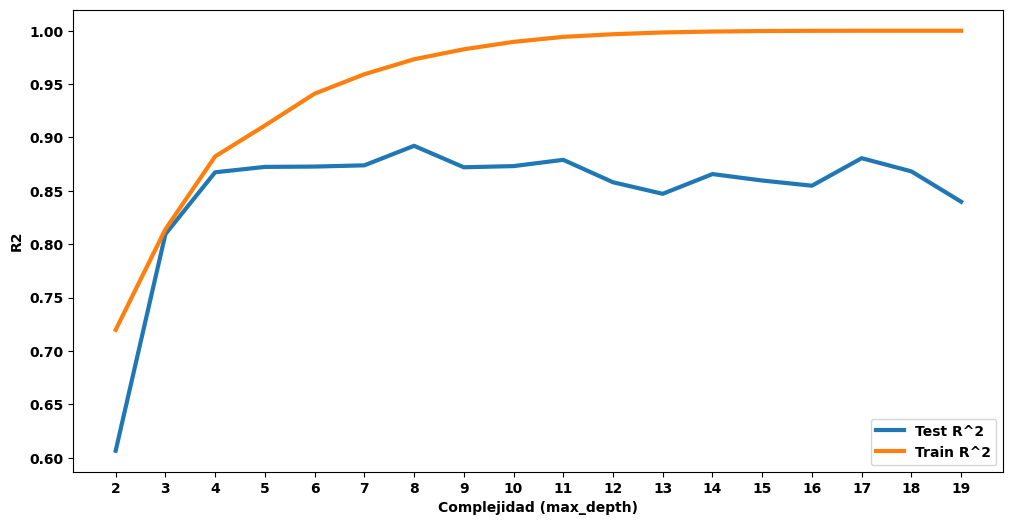

In [32]:
# Consideramos un rango para asignar el hiperparámetro 
hiper_param = np.arange(2,20)  
    
# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los árboles
train_r2 = np.zeros(hiper_param.size) 
test_r2 = np.zeros(hiper_param.size) 

for i in range(hiper_param.size):
    # Generamos un árbol para cada hiperparámetro, lo entrenamos y calculamos el R_cuadrado sobre datos de train y de test 
    mod_arbol = DecisionTreeRegressor(max_depth=hiper_param[i], random_state=100)
    mod_arbol.fit(X_train, y_train)
    train_r2[i] = r2_score(y_train, mod_arbol.predict(X_train)) 
    test_r2[i] = r2_score(y_test, mod_arbol.predict(X_test))    

# Graficamos el R_cuadrado de training versus de test
plt.plot(hiper_param, test_r2, linewidth=3, label='Test R^2')
plt.plot(hiper_param, train_r2, linewidth=3, label='Train R^2')
plt.xticks(hiper_param)
plt.xlabel('Complejidad (max_depth)')
plt.ylabel('R2')
plt.legend(loc = 'lower right')
plt.show()

In [33]:
df_hip = pd.DataFrame(hiper_param, columns=['hiper_param'])
df_hip['R_2'] = test_r2
df_hip

,hiper_param,R_2
0,2,0.606640
1,3,0.809529
2,4,0.867414
3,5,0.872461
4,6,0.872762
5,7,0.873924
6,8,0.892202
7,9,0.872107
8,10,0.873202
9,11,0.879080


Se puede apreciar que apartir de ***max_depth=4*** no se mejora tanto la capidad predictiva del modelo para el conjunto de pueba (test), a pesar de que la calidad máxima se consigue teniendo la profundidad máxima como ***max_depth=8***

Para asegurarnos y tener una visión del grado de posible sobre ajusto que puede tener el modelo, podemos analizar su rendimiento frente al tamaño de los datos utilizados en entrenamiento.   

Los modelos que muestran **mucho sesgo (bias) entre la capacidad predictiva del modelo en el conjunto de entrenamiento y el rendimiento del modelo en el conjunto de test**, suelen sufrir más de **overfitting**.

### Curva de aprendizaje (**Learning Curve**)

Definimos una función que toma el valor del hiperparámetro como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test: 

In [34]:
def curva_aprendizaje(profundidad: int):
    """Función para sacar la gráfica de Learning Curve a partir de la profundidad del árbol"""

    # Generar la estructura del árbol
    hiper_parametro = int(profundidad)   
    modelo_arbol = DecisionTreeRegressor(max_depth=hiper_parametro, random_state=100)
    
    # Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
    num_samples = np.linspace(2,X_train.shape[0]).astype(int)

    # Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los árboles
    train_R2 = np.zeros(num_samples.size) 
    test_R2 = np.zeros(num_samples.size)

    for i in range(num_samples.size):
        # Generamos un árbol para cada subconjunto de datos de entrenamiento y lo ajustamos  
        modelo_arbol.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

        # Calculamos el R_cuadrado sobre datos de train y de test
        train_R2[i] = r2_score(y_train[:num_samples[i]], modelo_arbol.predict(X_train[:num_samples[i]])) 
        test_R2[i] = r2_score(y_test, modelo_arbol.predict(X_test))

    # Graficamos el R_cuadrado de training versus de test
    plt.plot(num_samples, test_R2, label = 'Test R^2')
    plt.plot(num_samples, train_R2, label = 'Train R^2')
    plt.title('Curva de aprendizaje (Learning Curve) para la profundidad = %s' % hiper_parametro)
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('R2')
    plt.legend(loc = 'lower right')
    plt.show()    


Primero graficamos la curva de aprendizaje para la profundidad con el rendimiento más alto (***max_depth=8***)

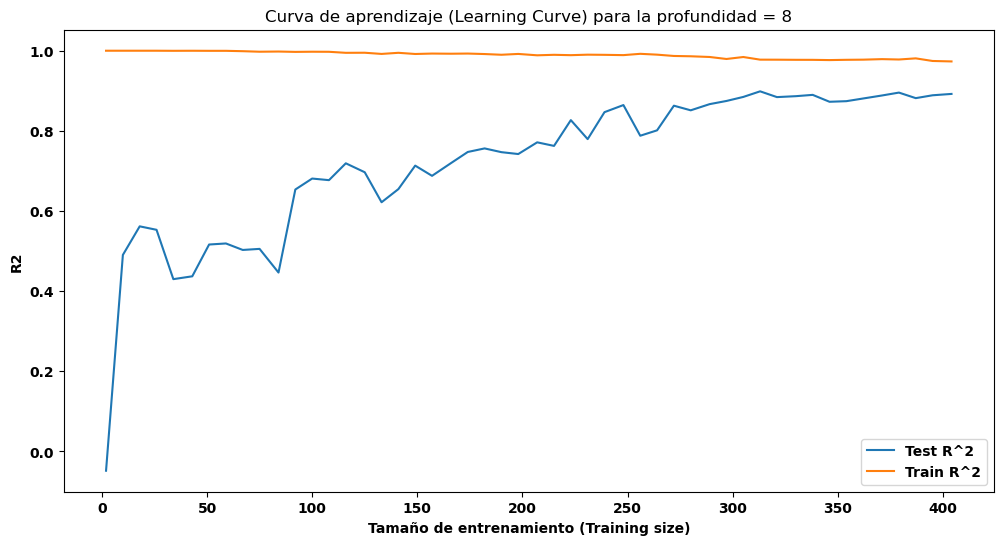

In [35]:
curva_aprendizaje(profundidad=8)

Después, graficamos la curva de aprendizaje para la profundidad máxima con un rendimiento aceptable (***max_depth=4***)

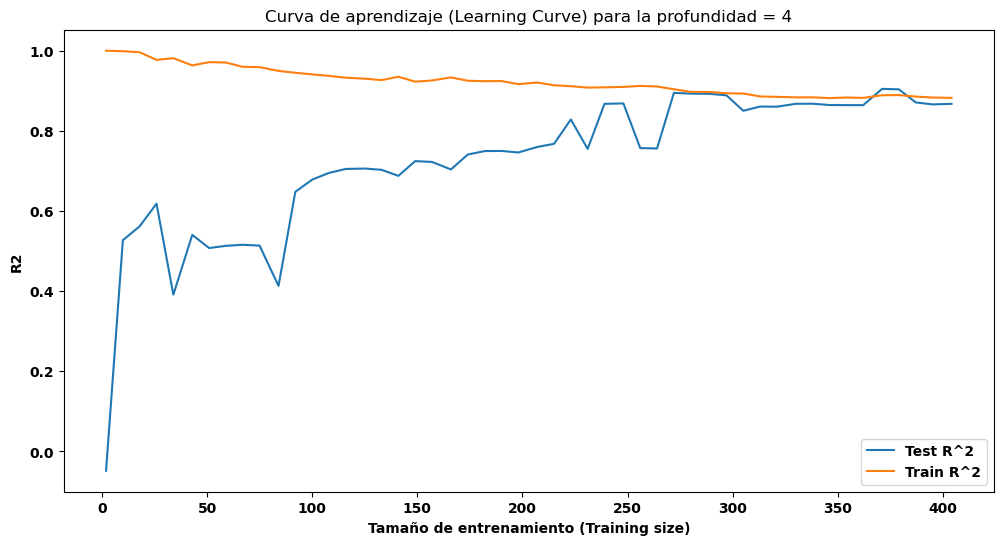

In [36]:
curva_aprendizaje(profundidad=4)

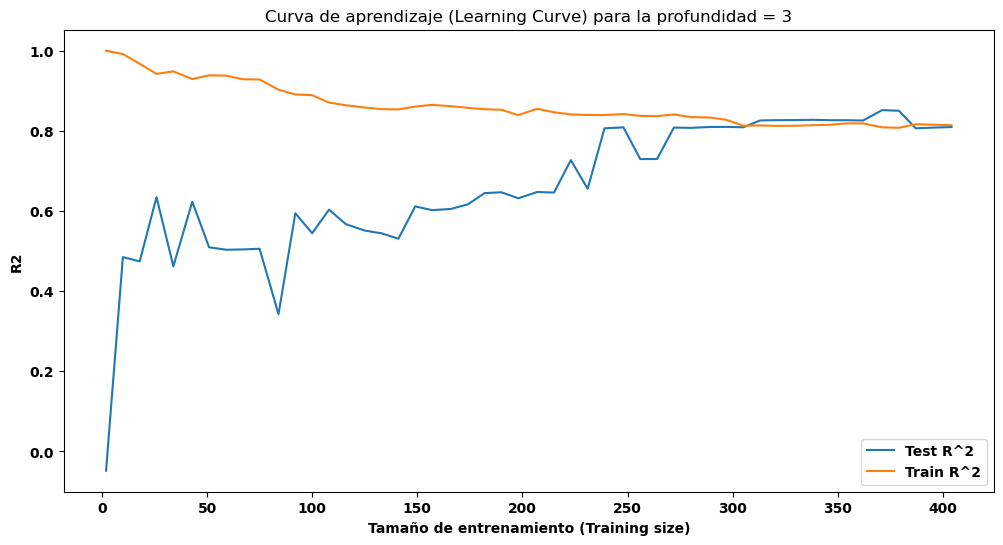

In [37]:
#Underfitting
curva_aprendizaje(profundidad=3)

Se puede observar claramente que esta vez **se convergen las dos lineas** de modo que el rendimiento del modelo sería muy similar tanto en training como en test y por lo tanto habrá **menos riesgo de _Overfitting_**.

### Grid Search

La técnica de ***GridSearchCV*** genera candidatos a partir de un conjunto de valores mediante un diccionario declarado como ***param_grid*** con los valores de los hiperparámetros a evaluar. Después, los valora usando diferentes subconjuntos de datos a partir de datos de entrenamiento y los criterios indicados.
 


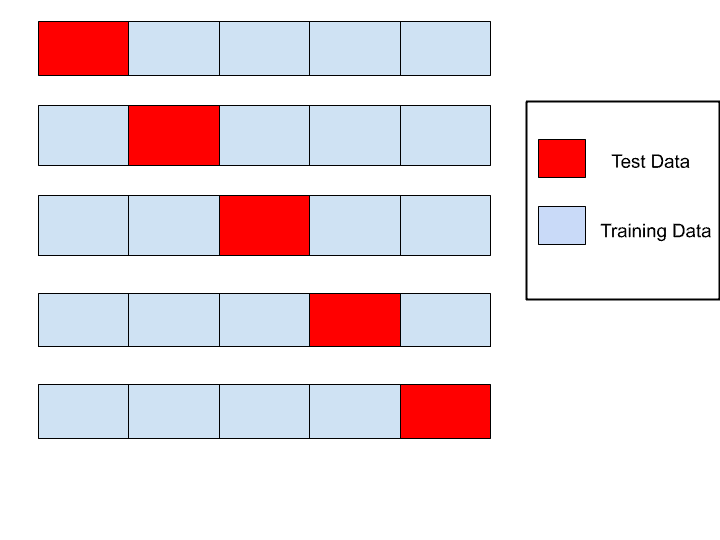

Aquí realizamos la búsqueda con un rango amplio de profundidades para el árbol que vamos a ajustar, haciendo un *10-fold cross-validation* de los datos de entrenamiento:

In [38]:
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Definimos la menra de trozear dataset de train para crear los subconjuntos que se utilizan en la validación cruzada (Cross-Validation)
folds = KFold(n_splits=10, shuffle=True, random_state=111) 

# Declaramos el tipo de regresor (modelo) y los rangos de hiperparámetros a considerar en la búsqueda
modelo = DecisionTreeRegressor(random_state=100)
parametros = {"max_depth":list(range(2,20))} 

# Establecer el R_cuadrado como la función de "scoring" a la hora de puntuar los modelos
scoreFun = make_scorer(r2_score)   

# Definir el Grid Search y realizar la búsqueda con los datos de entrenamiento
modelo_grid = GridSearchCV(estimator=modelo,
                          param_grid=parametros,
                          scoring=scoreFun,
                          cv=folds)  
modelo_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=111, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=100),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19]},
             scoring=make_scorer(r2_score))

In [39]:
# Consultar el modelo óptimo
modelo_grid.best_estimator_

DecisionTreeRegressor(max_depth=6, random_state=100)

In [40]:
# Calcular las predicciones del modelo óptimo
modelo_grid.best_estimator_.predict(X_test)

array([20.30895522, 22.67848101, 33.37878788, 22.67848101, 22.67848101,
        9.26060606,  9.26060606, 20.30895522, 17.65      , 20.30895522,
       20.30895522, 20.30895522, 14.62666667, 22.67848101, 23.83333333,
       20.30895522, 20.30895522, 20.30895522, 22.67848101, 22.67848101,
       22.67848101, 14.        , 22.67848101, 50.        , 20.30895522,
       17.65      , 42.9       , 46.12857143, 33.37878788, 27.52173913,
       38.7       , 20.30895522, 20.30895522, 15.6       , 20.30895522,
       22.67848101, 14.62666667, 14.62666667, 27.76666667, 33.37878788,
       33.37878788, 22.67848101, 14.62666667, 29.9375    ,  9.26060606,
       20.30895522, 20.30895522, 23.83333333, 20.30895522,  9.26060606,
       20.21428571, 14.        , 22.67848101, 22.67848101, 19.9375    ,
       27.52173913, 22.67848101, 15.        , 22.67848101, 19.9375    ,
       17.65      , 15.6       , 20.30895522, 20.30895522, 14.        ,
       49.7       , 22.67848101, 27.52173913,  9.26060606, 22.67

In [41]:
# Calcular las predicciones directamente de la salida de GridSearchCV
modelo_grid.predict(X_test)

array([20.30895522, 22.67848101, 33.37878788, 22.67848101, 22.67848101,
        9.26060606,  9.26060606, 20.30895522, 17.65      , 20.30895522,
       20.30895522, 20.30895522, 14.62666667, 22.67848101, 23.83333333,
       20.30895522, 20.30895522, 20.30895522, 22.67848101, 22.67848101,
       22.67848101, 14.        , 22.67848101, 50.        , 20.30895522,
       17.65      , 42.9       , 46.12857143, 33.37878788, 27.52173913,
       38.7       , 20.30895522, 20.30895522, 15.6       , 20.30895522,
       22.67848101, 14.62666667, 14.62666667, 27.76666667, 33.37878788,
       33.37878788, 22.67848101, 14.62666667, 29.9375    ,  9.26060606,
       20.30895522, 20.30895522, 23.83333333, 20.30895522,  9.26060606,
       20.21428571, 14.        , 22.67848101, 22.67848101, 19.9375    ,
       27.52173913, 22.67848101, 15.        , 22.67848101, 19.9375    ,
       17.65      , 15.6       , 20.30895522, 20.30895522, 14.        ,
       49.7       , 22.67848101, 27.52173913,  9.26060606, 22.67

Se puede apreciar que la función *GridSearchCV* realiza la búsqueda, crea y proporciona el modelo óptimo que se haya conseguido.  
Volvemos a consultar la calidad de este modelo:

In [42]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Generar las predicciones
predichos_grid = modelo_grid.predict(X_test)

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test, predichos_grid))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test, predichos_grid)*100)
print('Mean Squared Error:', mean_squared_error(y_test, predichos_grid))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, predichos_grid)))
print('R^2 coefficient of determination:', r2_score(y_test, predichos_grid))

Mean Absolute Error: 2.355108844833028
Mean Absolute Percentage Error: 13.018639842434219
Mean Squared Error: 11.376935218444826
Root Mean Squared Error: 3.372971274476678
R^2 coefficient of determination: 0.8727619170457721


In [43]:
# Podemos consultar la profundidad que ha llegado efectivamente a tener el árbol
best_depth = modelo_grid.best_estimator_.get_depth()
best_depth

6

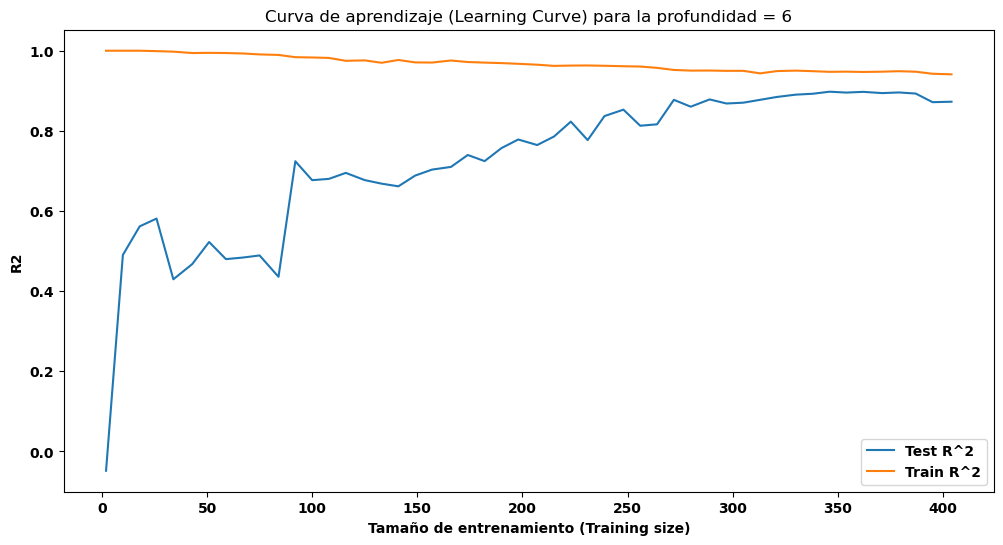

In [44]:
# Dibujamos el Learning Curve con esta profundidad
curva_aprendizaje(profundidad=best_depth)

Se observa que este modelo tiene un rendimiento ligeramente superior respecto al modelo con (*max_depth=4*) y posiblemente menos riesgo de overfitting respecto al modelo con mayor rendimiento (*max_depth=8*) 

---

### Dataset de **Advertising**

Este dataset consiste en un conjunto de datos relacionado con el gasto publicitario de diversos productos en campañas de marketing realizados por diferentes medios:  
 - **TV**: gastos en las cadenas de televisión.
 - **Radio**: gastos en las emisoras de la radio.
 - **Newspaper**: gastos en los periódicos.

La variable **Sales** contiene las ventas conseguidas para cada uno de los productos.

Vamos a realizar un estudio por si somos capeces de predecir esta variable en función de los gastos publicitarios por diferentes plataformas. Primero procedemos a la carga de los datos:

In [45]:
df_adv = pd.read_csv("Advertising.csv")
df_adv

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [46]:
# Sacamos la información interesante relacionado con el datast
df_adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      199 non-null    float64
 2   Newspaper  198 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Como se pueden ver existen varias columnas con valores nulos (*missing values*) que debemos identificarlos y posteriormente quitarlos del _DataFrame_.

In [47]:
# Consultar si hay valores perdidos
df_adv.isna().sum()

TV           0
Radio        1
Newspaper    2
Sales        0
dtype: int64

In [48]:
# Identificar los registros con valores perdidos
df_adv.drop(df_adv.dropna().index)

,TV,Radio,Newspaper,Sales
10,66.1,NaN,24.2,8.6
16,67.8,36.6,NaN,12.5
21,237.4,5.1,NaN,12.5


In [49]:
# Quitar los registros que contienen algún valor nulo y reestablecer los índices
df_adv = df_adv.dropna()
df_adv = df_adv.reset_index(drop=True)

In [50]:
# Consultar las estadísticas de los datos de la tabla
df_adv.describe()

,TV,Radio,Newspaper,Sales
count,197.000000,197.000000,197.000000,197.000000
mean,147.396954,23.377157,30.198477,14.065482
std,85.886694,14.820323,21.105794,5.240514
min,0.700000,0.000000,0.300000,1.600000
25%,75.100000,10.100000,12.600000,10.400000
50%,149.800000,23.300000,25.900000,12.900000
75%,218.500000,36.500000,45.100000,17.400000
max,296.400000,49.600000,100.900000,27.000000


In [51]:
# Definir las variables de entrada y la variable objetivo
X = df_adv.drop('Sales', axis='columns')
y = df_adv['Sales']

In [52]:
# Consultar los predictores del modelo a desarrollar
X

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
192,38.2,3.7,13.8
193,94.2,4.9,8.1
194,177.0,9.3,6.4
195,283.6,42.0,66.2


In [53]:
# Consultar la variable objetivo
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
192     7.6
193     9.7
194    12.8
195    25.5
196    13.4
Name: Sales, Length: 197, dtype: float64

In [54]:
# Dividir el dataset en Training y Test set
from sklearn.model_selection import train_test_split
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(X, y, test_size=0.2, random_state=99)

In [55]:
# Generar un modelo inicial y calcular las predicciones
from sklearn.tree import DecisionTreeRegressor


arbol_adv = DecisionTreeRegressor(max_depth=3, random_state=44)

arbol_adv.fit(X_train_adv, y_train_adv)

y_pred_adv = arbol_adv.predict(X_test_adv) 

In [56]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(y_test_adv, y_pred_adv))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_adv, y_pred_adv)*100)
print('Mean Squared Error:', mean_squared_error(y_test_adv, y_pred_adv))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_adv, y_pred_adv)))
print('R^2 coefficient of determination:', r2_score(y_test_adv, y_pred_adv))

Mean Absolute Error: 1.9693869507398916
Mean Absolute Percentage Error: 14.967893187859149
Mean Squared Error: 5.944541359587746
Root Mean Squared Error: 2.438143014588715
R^2 coefficient of determination: 0.7610232227534803


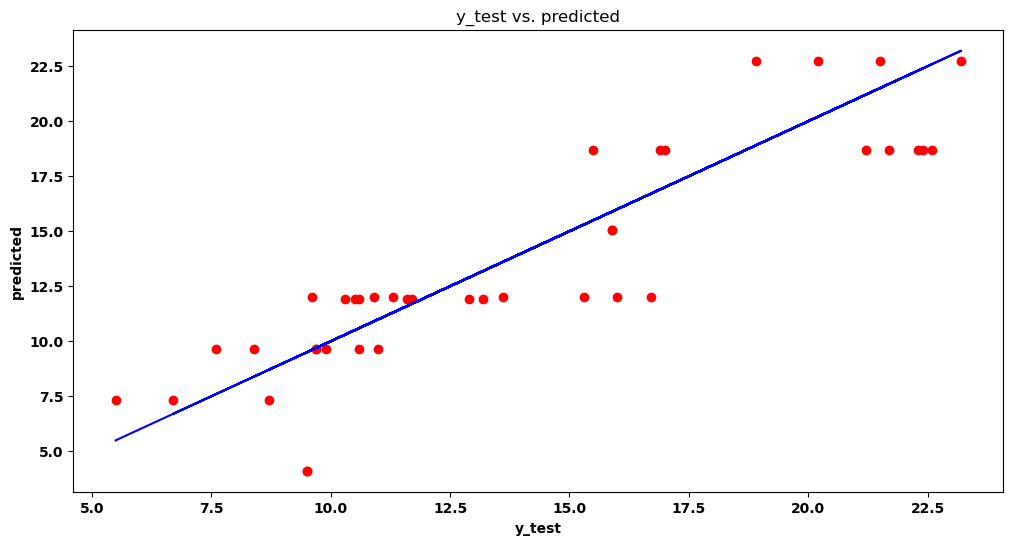

In [57]:
# visualizamos las predicciones
plt.scatter(y_test_adv, y_pred_adv, color = 'red')
plt.plot(y_test_adv, y_test_adv, color = 'blue')
plt.title('y_test vs. predicted')
plt.xlabel('y_test')
plt.ylabel('predicted')
plt.show()

---

### **`Ejercicio 8`**

**`8.1`** Saca la gráfica de *Model Complexity Curve* que dibuja la evolución de R_cuadrado de training versus del test para el rango de profundidades entre `2` y `30` **inclusive**. (`random_state=100`) ¿Cuál crees que sería el rango de valores aceptables según esta gráfica? 

**`8.2`** Define una función que coja la profundidad máxima para un árbol y dibuje el *Learning Curve* que visualiza la evolución del rendimiento del modelo tanto en training como en test, en función del tamaño de subconjuntos de datos de entrenamiento que empiezan con 2 registros y se aumentan **de 5 en 5** hasta considerar todos los datos de training. Después aplíca la función declarada con la *`profundidad=2`* y **analiza** el resultado. (`random_state=100`)  

**`8.3`** Para el rango de profundidades entre `2` y `30` **inclusive**:

- **`8.3.1`** Realiza una búsqueda del valor de hiperparámetro y el modelo óptimo usando la técnica de *Grid Search*. Imprime el valor óptimo obtenido, considerando:
  - para _KFold_: (`random_state=111`)   
  - para _modelo_: (`random_state=100`)  

- **`8.3.2`** Visualiza los resultados del mejor modelo conseguido con la gráfica de *"Valores reales vs. predichos"* para el conjunto de test.

- **`8.3.3`** Calcula diferentes métricas para evaluar tu modelo y **analiza** su rendimiendo en comparación con el modelo anterior.
    - MAE
    - MAPE
    - MSE
    - RMSE
    - $R^2$    
      
- **`8.3.4`** Saca la gráfica de *Learning Curve* para el modelo óptimo, usando la función definida en el paso `8.2` y explica si este modelo tiene preferencia o no, para ser elegido en práctica como predictor de la venta de productos anunciados comparando con el modelo inicial.  

**`Punto extra!`**  
Si tienes otra recomendación indica el modelo que crees que sería la mejor opción explicando tu opinión al respecto.   

---

In [58]:
## Solución
# Ejercicio 8.1
rango = np.arange(2,31)  

train_r2_8_1 = np.zeros(rango.size) 
test_r2_8_1 = np.zeros(rango.size)

In [59]:
for i in range(rango.size):
    modelo_arbol_8_1 = DecisionTreeRegressor(max_depth=rango[i], random_state=100)
    modelo_arbol_8_1.fit(X_train_adv, y_train_adv)
    train_r2_8_1[i] = r2_score(y_train_adv, modelo_arbol_8_1.predict(X_train_adv)) 
    test_r2_8_1[i] = r2_score(y_test_adv, modelo_arbol_8_1.predict(X_test_adv))    

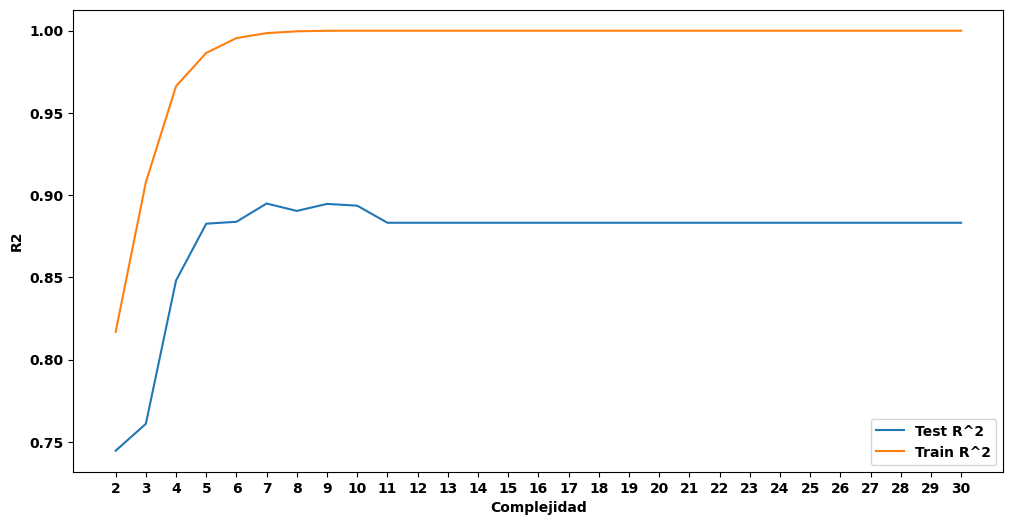

In [60]:
plt.plot(rango, test_r2_8_1, label='Test R^2')
plt.plot(rango, train_r2_8_1, label='Train R^2')
plt.xticks(rango)
plt.xlabel('Complejidad')
plt.ylabel('R2')
plt.legend()
plt.show()

##### Análisis del resultado:
El R^2 de entrenamiento tiende a ser alto y el R^2 de prueba es bajo es más bajo, esto indica sobreajuste (overfitting). El modelo está demasiado ajustado a los datos de entrenamiento y no generaliza bien a nuevos datos. En este caso, el rango de valores aceptables segúnla gráfica sería el de profundidades de 4-5.

In [69]:
## Solución
# Ejercicio 8.2
def learning_curve_8_2(profundidad: int):
    depth = int(profundidad)   
    modelo_arbol_8_2 = DecisionTreeRegressor(max_depth=depth, random_state=100)
    
    num_samples_8_2 = np.arange(2, X_train_adv.value_counts().sum() +1, 5)

    train_R2_8_2 = np.zeros(num_samples_8_2.size) 
    test_R2_8_2 = np.zeros(num_samples_8_2.size)

    for i in range(num_samples_8_2.size):
        modelo_arbol_8_2.fit(X_train_adv[:num_samples_8_2[i]], y_train_adv[:num_samples_8_2[i]])

        train_R2_8_2[i] = r2_score(y_train_adv[:num_samples_8_2[i]], modelo_arbol_8_2.predict(X_train_adv[:num_samples_8_2[i]])) 
        test_R2_8_2[i] = r2_score(y_test_adv, modelo_arbol_8_2.predict(X_test_adv))

    plt.plot(num_samples_8_2, test_R2_8_2, label = 'Test R^2')
    plt.plot(num_samples_8_2, train_R2_8_2, label = 'Train R^2')
    plt.title('Curva de aprendizaje para profundidad = %s' % depth)
    plt.xlabel('Tamaño de entrenamiento')
    plt.ylabel('R2')
    plt.legend(loc = 'lower right')
    plt.show()        

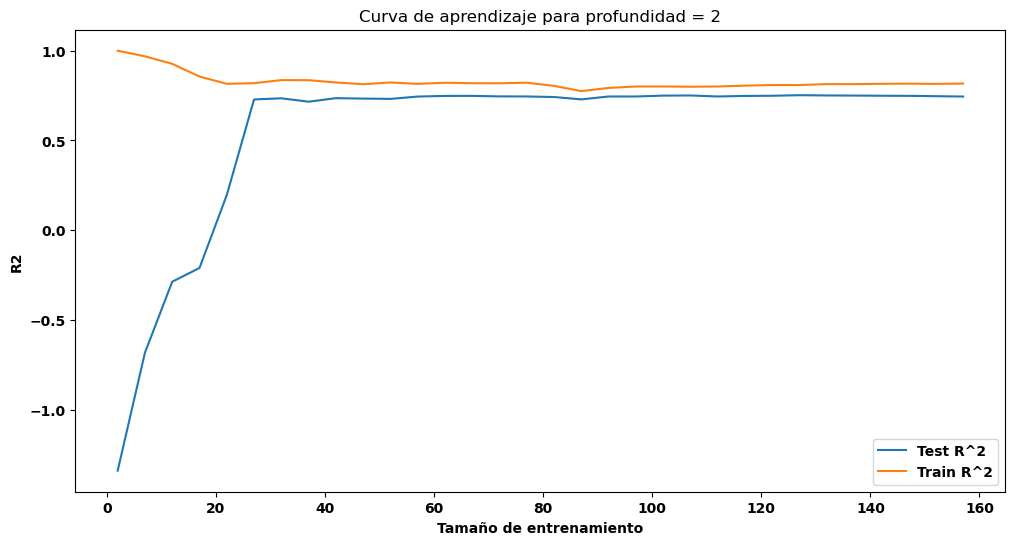

In [70]:
learning_curve_8_2(2)

##### Análisis del resultado:
A medida que se aumenta el tamaño del conjunto de entrenamiento, el rendimiento en el conjunto de entrenamiento disminuye ligeramente, ya que el modelo tiene más datos para generalizar y ya no puede ajustarse tan perfectamente a los ejemplos individuales.

Al mismo tiempo, el rendimiento en el conjunto de prueba mejora significativamente a medida que se añaden más datos, esto indica que el modelo se beneficia de más ejemplos y está generalizando mejor. Cuando el rendimiento en el conjunto de prueba se estabiliza (entorno a 30), indica que el modelo ha alcanzado su capacidad de generalización máxima con los datos disponibles.

In [63]:
## Solución
# Ejercicio 8.3.1
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Revisar nsplits
folds_8_3_1 = KFold(n_splits=10, shuffle=True, random_state=111) 

modelo_8_3_1 = DecisionTreeRegressor(random_state=100)
params_8_3_1 = {"max_depth":list(range(2,31))} 

scoreFun = make_scorer(r2_score)   

modelo_grid_8_3_1 = GridSearchCV(estimator=modelo_8_3_1,
                          param_grid=params_8_3_1,
                          scoring=scoreFun,
                          cv=folds_8_3_1)  
modelo_grid_8_3_1.fit(X_train_adv, y_train_adv)

modelo_grid_8_3_1.best_estimator_



DecisionTreeRegressor(max_depth=8, random_state=100)

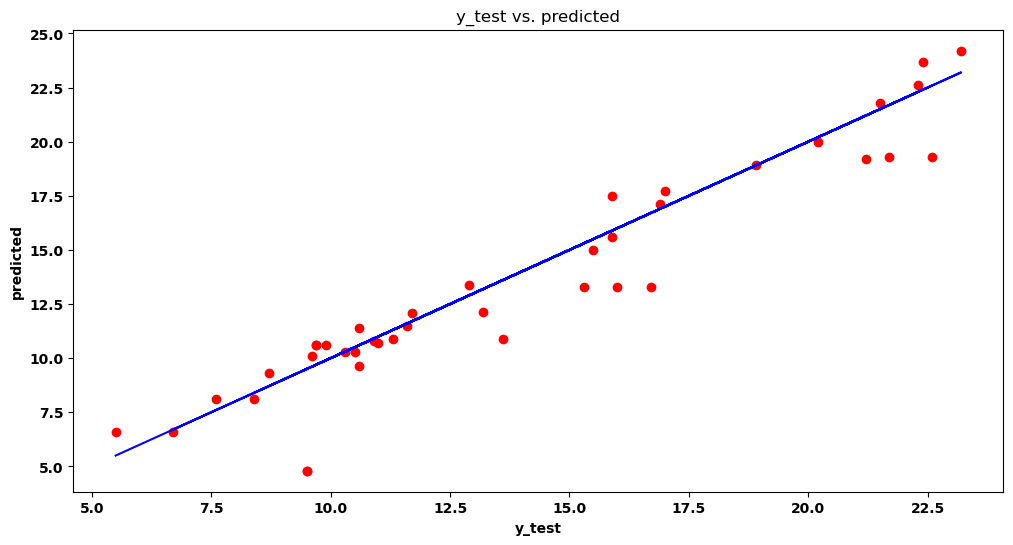

In [64]:
## Solución
# Ejercicio 8.3.2
from sklearn.tree import DecisionTreeRegressor

## probablemente el random estate se pueda coger directamente tambien
arbol_8_3_2 = DecisionTreeRegressor(max_depth=modelo_grid_8_3_1.best_estimator_.get_depth(), random_state=100)

arbol_8_3_2.fit(X_train_adv, y_train_adv)

y_pred_8_3_2= arbol_8_3_2.predict(X_test_adv) 

plt.scatter(y_test_adv, y_pred_8_3_2, color = 'red')
plt.plot(y_test_adv, y_test_adv, color = 'blue')
plt.title('y_test vs. predicted')
plt.xlabel('y_test')
plt.ylabel('predicted')
plt.show()


In [65]:
## Solución
# Ejercicio 8.3.3
print('Mean Absolute Error:', mean_absolute_error(y_test_adv, y_pred_8_3_2))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(y_test_adv, y_pred_8_3_2)*100)
print('Mean Squared Error:', mean_squared_error(y_test_adv, y_pred_8_3_2))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_adv, y_pred_8_3_2)))
print('R^2 coefficient of determination:', r2_score(y_test_adv, y_pred_8_3_2))


Mean Absolute Error: 1.1181250000000003
Mean Absolute Percentage Error: 8.746112953648419
Mean Squared Error: 2.725078125000001
Root Mean Squared Error: 1.650781065132503
R^2 coefficient of determination: 0.890449010501518


##### Análisis del resultado:
En comparación con el modelo anterior, podemos decir que es mejor. Ya que los valores como MAE, MSE o RMSE son más bajos, el MAPE es mucho menor, y el coeficiente de determinación es mucho mayor.

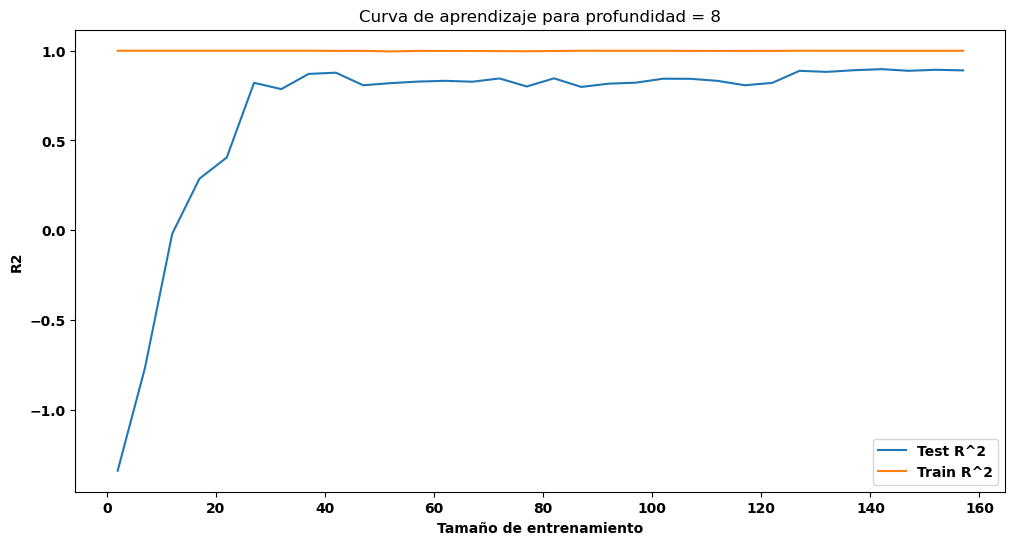

In [71]:
## Solución
# Ejercicio 8.3.4
learning_curve_8_2(modelo_grid_8_3_1.best_estimator_.get_depth())


##### Análisis del resultado:

A medida que se aumenta el tamaño del conjunto de entrenamiento, el rendimiento se mantiene, ya que el modelo no puede ajustarse más a los ejemplos individuales.

Al mismo tiempo, el rendimiento en el conjunto de prueba mejora significativamente a medida que se añaden más datos, esto indica que el modelo se beneficia de más ejemplos y está generalizando mejor. Cuando el rendimiento en el conjunto de prueba se estabiliza (entorno a 30), indica que el modelo ha alcanzado su capacidad de generalización máxima con los datos disponibles.

Esto indica que es un buen modelo con el que seguir trabajando ya que a medida que se vayan incluyendo mayor carga de datos seguirá teniedno un buen rendimiento.

##### Punto extra:
La elección del mejor modelo depende de los datos que se van a utilizar para el análisis y del objetivo que se quiere conseguir. No hay un modelo único que sea siempre el mejor en todas las situaciones, ya que cada modelo tiene sus ventajas y desventajas.

---